### 1. Import the Necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dsn-ai-futa-challenge/Test.csv
/kaggle/input/dsn-ai-futa-challenge/Sample_Submission.csv
/kaggle/input/dsn-ai-futa-challenge/Train.csv


### 2. Load the Datasets

In [2]:
# read in all data
train = pd.read_csv('/kaggle/input/dsn-ai-futa-challenge/Train.csv')
test = pd.read_csv('/kaggle/input/dsn-ai-futa-challenge/Test.csv')
submission = pd.read_csv('/kaggle/input/dsn-ai-futa-challenge/Sample_Submission.csv')

In [3]:
#print out the shape of both Train and Test data
print('Train shape',train.shape)
print('Test shape',test.shape)

Train shape (2994, 14)
Test shape (1996, 13)


In [4]:
#Print the head of train
train.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Average_Price_per_ProductType,Product_Supermarket_Sales
0,NCA29,CHUKWUDI046,NCA29_CHUKWUDI046,10.500,Low Fat,0.027276,Household,428.28,2004,Small,Cluster 1,Supermarket Type1,399.999418,8983.31
1,FDG53,CHUKWUDI049,FDG53_CHUKWUDI049,10.000,Low Fat,0.045928,Frozen Foods,345.30,2006,Medium,Cluster 1,Supermarket Type1,388.071094,4893.63
2,NCN05,CHUKWUDI045,NCN05_CHUKWUDI045,8.235,Low Fat,0.014489,Health and Hygiene,459.49,2009,NaN,Cluster 2,Supermarket Type1,367.143029,7323.80
3,NCV17,CHUKWUDI046,NCV17_CHUKWUDI046,18.850,Low Fat,0.016108,Health and Hygiene,324.41,2004,Small,Cluster 1,Supermarket Type1,367.143029,7541.85
4,FDK03,CHUKWUDI045,FDK03_CHUKWUDI045,12.600,Normal Fat,0.074070,Dairy,635.59,2009,NaN,Cluster 2,Supermarket Type1,409.504343,11445.10


In [5]:
#Print the head of test
test.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Average_Price_per_ProductType
0,FDY57,CHUKWUDI013,FDY57_CHUKWUDI013,20.20,Normal Fat,0.121153,Snack Foods,243.44,1994,High,Cluster 3,Supermarket Type1,395.352190
1,FDY10,CHUKWUDI018,FDY10_CHUKWUDI018,17.60,Low Fat,0.049268,Snack Foods,282.54,2016,Medium,Cluster 3,Supermarket Type2,395.352190
2,FDO40,CHUKWUDI018,FDO40_CHUKWUDI018,17.10,Low Fat,0.032761,Frozen Foods,372.10,2016,Medium,Cluster 3,Supermarket Type2,388.071094
3,NCQ43,CHUKWUDI018,NCQ43_CHUKWUDI018,17.75,Low Fat,0.000000,Others,271.73,2016,Medium,Cluster 3,Supermarket Type2,388.607700
4,NCC07,CHUKWUDI046,NCC07_CHUKWUDI046,19.60,Low Fat,0.023951,Household,264.24,2004,Small,Cluster 1,Supermarket Type1,399.999418


The goal of this competition is to predict <b>Product_Supermarket_Sales</b>. If you look closely, you will realize that it is not provided in the test data.

### 3. Exploratory Data Analysis (EDA)

Product_Supermarket_Sales is the target variable we are trying to predict, so lets explore it.

In [6]:
#Total number of entries that are missing in each column
train.isna().sum()

Product_Identifier                  0
Supermarket_Identifier              0
Product_Supermarket_Identifier      0
Product_Weight                    473
Product_Fat_Content                 0
Product_Shelf_Visibility            0
Product_Type                        0
Product_Price                       0
Supermarket_Opening_Year            0
Supermarket _Size                 884
Supermarket_Location_Type           0
Supermarket_Type                    0
Average_Price_per_ProductType       0
Product_Supermarket_Sales           0
dtype: int64

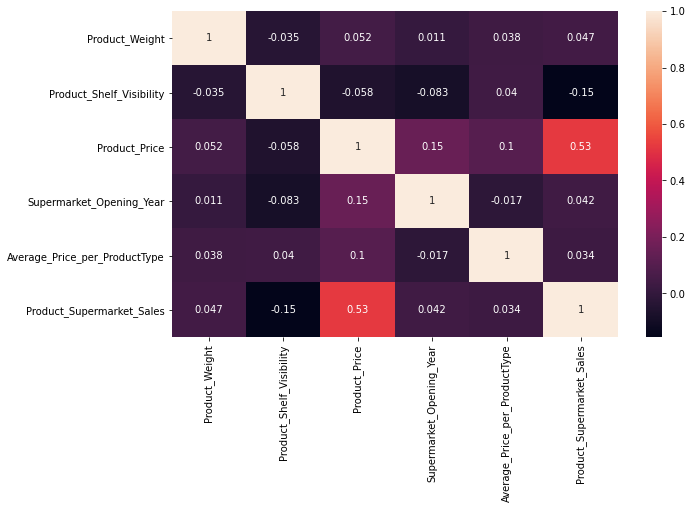

In [7]:
plt.figure(figsize=(10,6)) # Set the size of the plot
sns.heatmap(train.corr(),annot=True) # Correlation Heatmap

At a glance we can see that the highest correlated feature to Product_Supermaket_Sales is Product_Price followed by Supermaket_Opening_Year. And that makes sense because the more a shop sells  expensive goods the higher their total sales get.
Another observation is that it seems the year of opening also has some correlation with product sales. Lets plot some one to one plot to see if this is a negative or positive trend .


<Figure size 432x288 with 0 Axes>

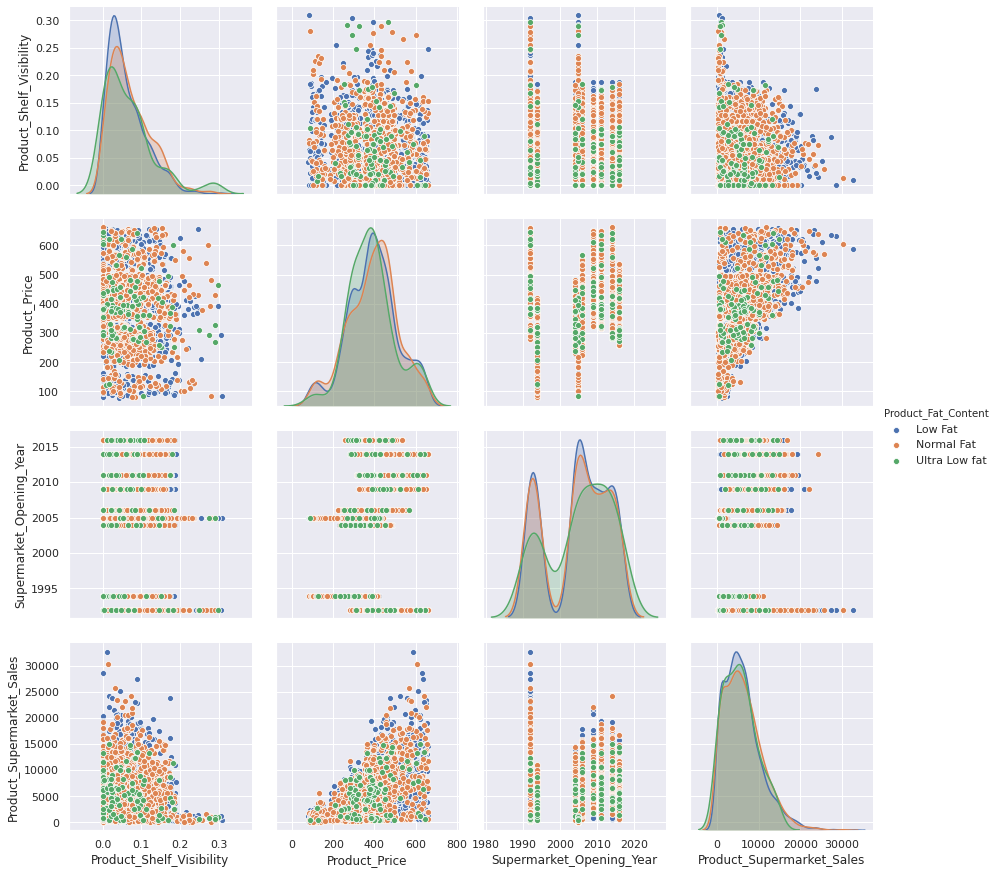

<Figure size 432x288 with 0 Axes>

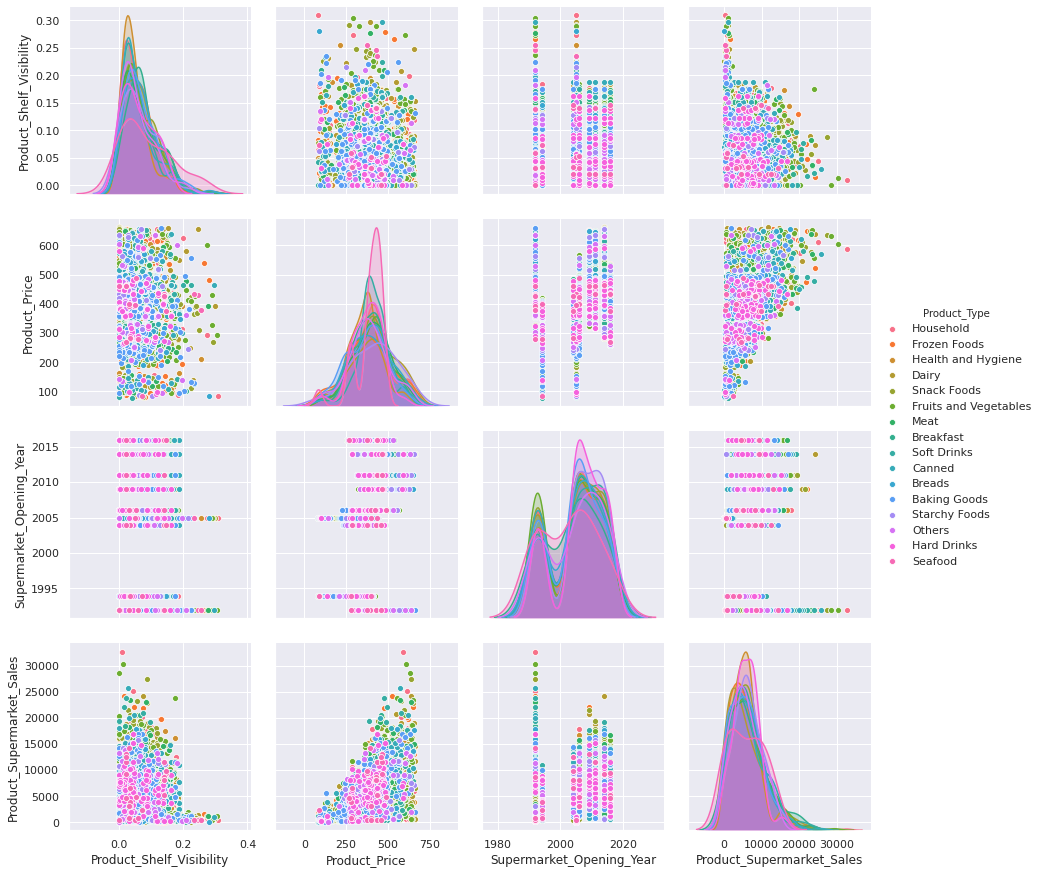

<Figure size 432x288 with 0 Axes>

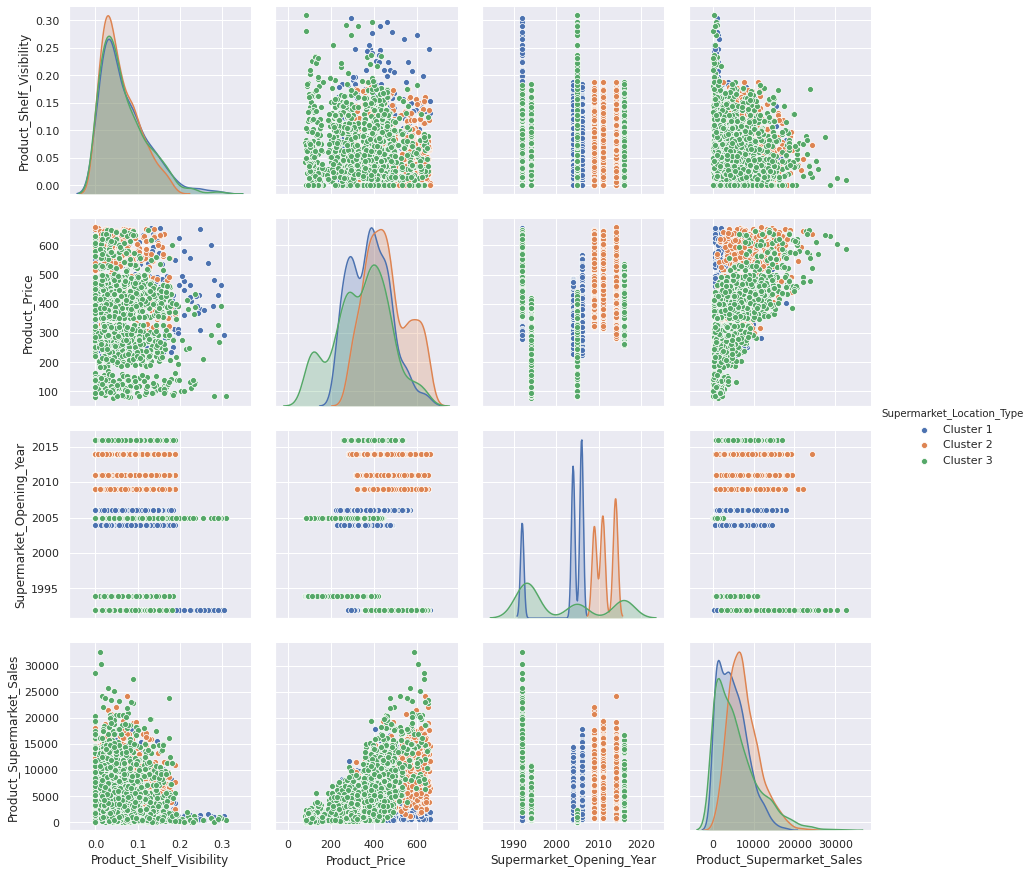

<Figure size 432x288 with 0 Axes>

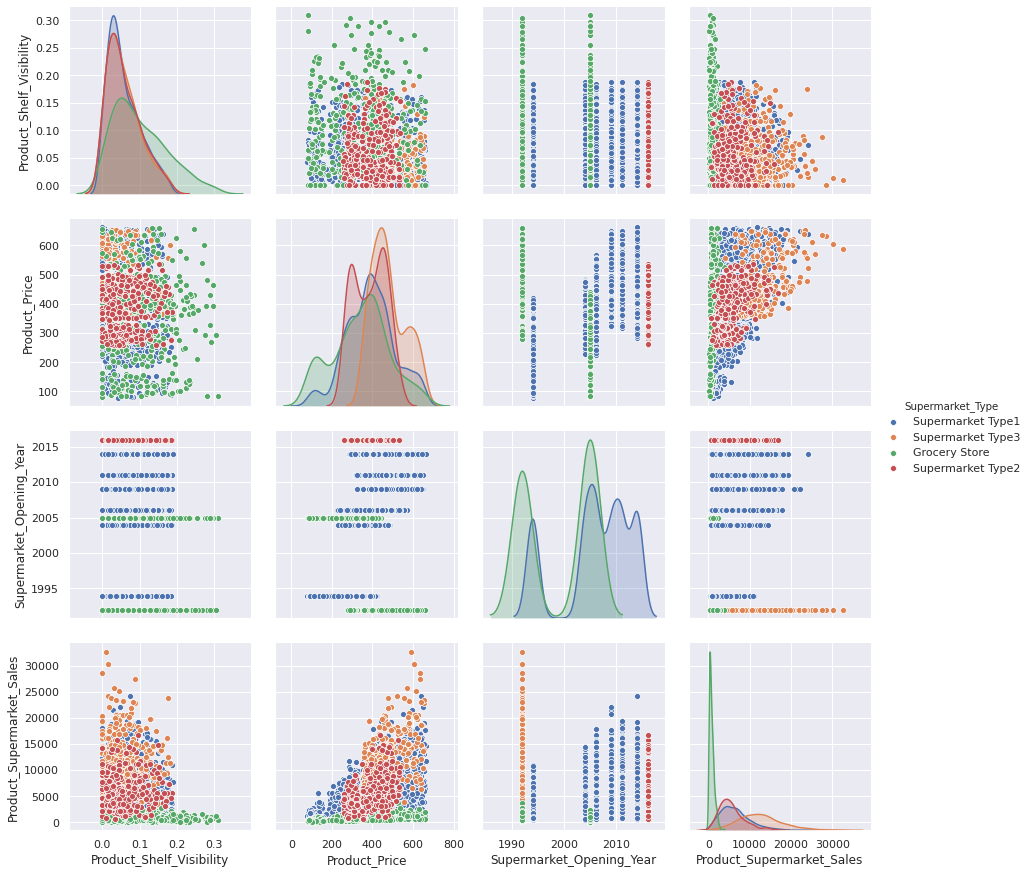

In [8]:
#scatterplot of all features
cat_col = ['Product_Fat_Content','Product_Type','Supermarket_Location_Type','Supermarket_Type']#get categorical features of train data

for columns in cat_col: 
    sns.set()
    cols = ['Product_Identifier', 'Supermarket_Identifier',
           'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
           'Product_Price', 'Supermarket_Opening_Year',
           'Supermarket_Location_Type', 'Supermarket_Type',
           'Product_Supermarket_Sales']
    plt.figure()
    sns.pairplot(train[cols], size = 3.0, hue=columns)
    plt.show()


From the plot above, we can confirm that an increase in price of product really makes Total sales increase. Also there seems to be a very little trend in the Supermarket  opening year and the total sales, otherwise no other feature really correlates with Total sales

**Dealing with missing values**

*Taking care of missing entries in the data set*
There are different strategies to fill missing value in the data.You can check online to know more.<br>
In this notebook I will use mode and mean strategy to fill both categorical features and numerical features respectively.

In [9]:
# the columns contain missing value are 1.Product_Weight(Numerical) 2. Supermarket _Size (Categorical)
train['Product_Weight'].fillna(train['Product_Weight'].mean(),inplace=True)
train['Supermarket _Size'].fillna(train['Supermarket _Size'].mode()[0],inplace=True)

# We will have to use the same strategy for out test data
test['Product_Weight'].fillna(test['Product_Weight'].mean(),inplace=True)
test['Supermarket _Size'].fillna(test['Supermarket _Size'].mode()[0],inplace=True)

In [10]:
#Now we have no missing values in both train and test data
train.isna().sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket _Size                 0
Supermarket_Location_Type         0
Supermarket_Type                  0
Average_Price_per_ProductType     0
Product_Supermarket_Sales         0
dtype: int64

In [11]:
test.isna().sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket _Size                 0
Supermarket_Location_Type         0
Supermarket_Type                  0
Average_Price_per_ProductType     0
dtype: int64

### 4. Features Engineering
Simple rule: Same transformation or generation must be done to both train and test data

In [12]:
# Concatenate train and test sets for easy feature engineering.
# You can as well apply the transformations separately on the train and test data intead of concatenating them.
ntrain = train.shape[0]
ntest = test.shape[0]

#get target variable
y = train['Product_Supermarket_Sales']

all_data = pd.concat((train,test)).reset_index(drop=True)

#drop target variable
all_data.drop(['Product_Supermarket_Sales'], axis=1, inplace=True)

print("Total data size is : {}".format(all_data.shape))

Total data size is : (4990, 13)


In [13]:
# Let's Create the squarred root of Product_Price
all_data['Product_Price_sqrt'] = np.sqrt(all_data['Product_Price'])

#Create some cross features
all_data['cross_Price_weight'] = all_data['Product_Price'] * all_data['Product_Weight']

**Encoding some categorical features for easy usability by Machine Learning Algorithms**

In [14]:
all_data.columns

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Average_Price_per_ProductType', 'Product_Price_sqrt',
       'cross_Price_weight'],
      dtype='object')

In [15]:
one_hot_cols = ['Supermarket_Type','Supermarket _Size','Product_Type','Supermarket_Location_Type']

label_cols = ['Product_Identifier','Supermarket_Identifier','Product_Fat_Content']

Applying One hot encoding to one_hot_cols

In [16]:
all_data = pd.get_dummies(all_data,prefix_sep="_",columns=one_hot_cols)

Applying Label encoding to label_cols

In [17]:
for col in label_cols:
    all_data[col] = all_data[col].factorize()[0]

In [18]:
# We are going to drop Product_Supermarket_Identifier' since it's just an ID and we don't need it.
all_data.drop('Product_Supermarket_Identifier',axis=1,inplace=True)

Now that we are done with feature engineering, Let's split our data back to train and test

In [19]:
#Lets get the new train and test set
train = all_data[:ntrain]
test = all_data[ntrain:]

print('Train size: ' + str(train.shape))
print('Test size: ' + str(test.shape))

Train size: (2994, 36)
Test size: (1996, 36)


In [20]:
train.head()

,Product_Identifier,Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Average_Price_per_ProductType,Product_Price_sqrt,cross_Price_weight,...,Product_Type_Household,Product_Type_Meat,Product_Type_Others,Product_Type_Seafood,Product_Type_Snack Foods,Product_Type_Soft Drinks,Product_Type_Starchy Foods,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3
0,0,0,10.500,0,0.027276,428.28,2004,399.999418,20.694927,4496.94000,...,1,0,0,0,0,0,0,1,0,0
1,1,1,10.000,0,0.045928,345.30,2006,388.071094,18.582250,3453.00000,...,0,0,0,0,0,0,0,1,0,0
2,2,2,8.235,0,0.014489,459.49,2009,367.143029,21.435718,3783.90015,...,0,0,0,0,0,0,0,0,1,0
3,3,0,18.850,0,0.016108,324.41,2004,367.143029,18.011385,6115.12850,...,0,0,0,0,0,0,0,1,0,0
4,4,2,12.600,1,0.074070,635.59,2009,409.504343,25.210910,8008.43400,...,0,0,0,0,0,0,0,0,1,0


In [21]:
test.head()

,Product_Identifier,Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Average_Price_per_ProductType,Product_Price_sqrt,cross_Price_weight,...,Product_Type_Household,Product_Type_Meat,Product_Type_Others,Product_Type_Seafood,Product_Type_Snack Foods,Product_Type_Soft Drinks,Product_Type_Starchy Foods,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3
2994,894,7,20.20,1,0.121153,243.44,1994,395.352190,15.602564,4917.4880,...,0,0,0,0,1,0,0,0,0,1
2995,380,8,17.60,0,0.049268,282.54,2016,395.352190,16.808926,4972.7040,...,0,0,0,0,1,0,0,0,0,1
2996,817,8,17.10,0,0.032761,372.10,2016,388.071094,19.289894,6362.9100,...,0,0,0,0,0,0,0,0,0,1
2997,243,8,17.75,0,0.000000,271.73,2016,388.607700,16.484235,4823.2075,...,0,0,1,0,0,0,0,0,0,1
2998,1273,0,19.60,0,0.023951,264.24,2004,399.999418,16.255461,5179.1040,...,1,0,0,0,0,0,0,1,0,0


You can do more feature engineering to improve your scores. You can also consider scalling too if you are using linear models.

### 5. Modelling

In [22]:
# Spllitting train data into training and validation set. We are using just 20%(0.2) for validation 
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size=0.2,random_state=42)

In [23]:
# Define the model
lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_hat = lr.predict(X_test)

**Check Validation Score and Training Score**

We are not expecting large difference in the values.

In [26]:
print('Validation scores', np.sqrt(mean_squared_error(y_test, y_hat)))

print('Training scores', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

Validation scores 2841.1327467457445
Training scores 3022.311806770682


Seems We got a pretty good model...<br>
Also we did not overfit because our mean_squared_error is lower on Validation data compare to train data

Now Let's get our prediction for submission

In [27]:
test_pred = lr.predict(test);test_pred

array([3870.15057135, 4200.91715805, 5172.44842836, ..., 1333.51056088,
         76.62306233, 7375.3195438 ])

### 6. Submission File

In [28]:
submission.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,FDY57_CHUKWUDI013,0
1,FDY10_CHUKWUDI018,0
2,FDO40_CHUKWUDI018,0
3,NCQ43_CHUKWUDI018,0
4,NCC07_CHUKWUDI046,0


In [29]:
submission['Product_Supermarket_Sales'] = test_pred

In [30]:
submission.to_csv('first_submission.csv',index=False)
#If you submit this you should at least find a better position on the LeaderBoard

**Improvement Tips.....**

1. Generate more features
2. Use other Cross-Validation Techniques
3. Try Tree based models

if you have any question, kindly drop it in the comment section below.

**Don't Forget to give this Notebook an upvote if you found its content helpful.**<br>
***@Christomesh***